-0.2
-0.15
-0.1
-0.0499999999999999
0.0
0.0499999999999999
0.1
0.15
0.2


3.091704839049881e-12

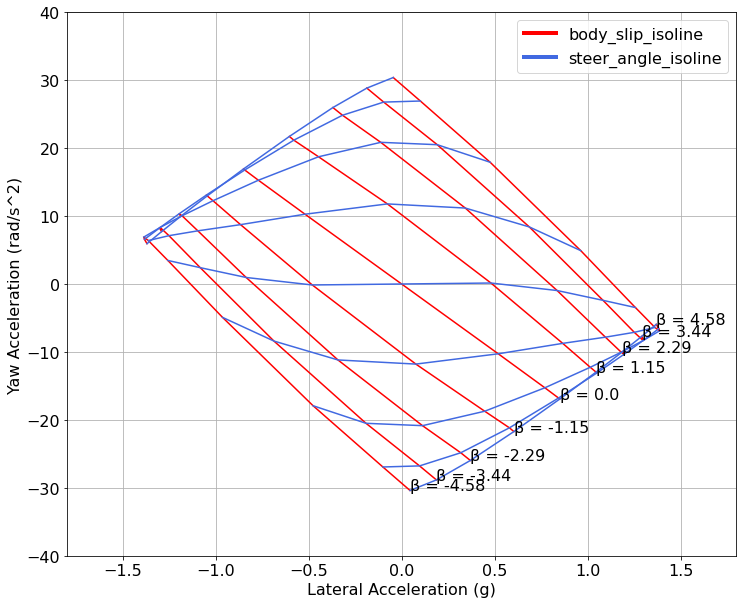

In [11]:
from suspension import Suspension
from vehicle import Vehicle
from aerodynamics import Aerodynamics
import math
from scipy.optimize import fsolve as josie_solver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

df = pd.read_csv("export/MMM.csv")

fig = plt.figure()
fig.set_size_inches(12, 10)

plt.rc('font', size=16)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

for x in df["body_slip"].unique():
    df2 = df[df["body_slip"] == x]
    plt.plot(df2["y_double_dot"]/9.81, df2["yaw_acceleration"], 'red', label='body_slip_isoline')
    plt.text(list(df2["y_double_dot"])[-1]/9.81, list(df2["yaw_acceleration"])[-1], f'\u03B2 = {round(x*180/math.pi,2)}')

for x in df["steered_angle"].unique():
    print(x)
    df2 = df[(df["steered_angle"] == x)]
    plt.plot(df2["y_double_dot"]/9.81, df2["yaw_acceleration"], 'royalblue', label='steer_angle_isoline')


plt.grid()
major_ticks = np.arange(0, 101, 20)
minor_ticks = np.arange(0, 101, 5)

plt.xlabel("Lateral Acceleration (g)")
plt.xlim([-1.8,1.8])
plt.ylabel("Yaw Acceleration (rad/s^2)")
plt.ylim([-40,40])

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="red", lw=4),
                Line2D([0], [0], color="royalblue", lw=4)]
plt.legend(custom_lines, ['body_slip_isoline', 'steer_angle_isoline'])
plt.savefig('test.png', bbox_inches='tight')
abs(df["yaw_acceleration"]).min()

